# Decision Tree Pipeline - Titanic Survival Prediction

This notebook demonstrates a complete end-to-end machine learning pipeline using **Decision Tree Classifier** to predict passenger survival on the Titanic.

## Pipeline Overview:
1. **Data Loading** - Load the Titanic dataset
2. **Exploratory Data Analysis** - Understand the data
3. **Data Cleaning** - Handle missing values and outliers
4. **Feature Engineering** - Create and transform features
5. **Train-Test Split** - Split data for training and evaluation
6. **Model Training** - Build a Decision Tree model with sklearn Pipeline
7. **Model Evaluation** - Accuracy, Precision, Recall, F1, ROC-AUC, Confusion Matrix
8. **Model Export** - Save the trained model using joblib

## 1. Import Required Libraries

First, let's import all the necessary libraries for our ML pipeline.

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn imports
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score,
    confusion_matrix, 
    classification_report,
    roc_auc_score,
    roc_curve
)

# Model export
import joblib

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')

print("All libraries imported successfully!")

All libraries imported successfully!


## 2. Data Loading

We'll load the Titanic dataset directly from a public URL. This dataset contains information about passengers aboard the Titanic, including whether they survived.

In [2]:
# Load the Titanic dataset from a public URL
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Display basic information
print(f"Dataset Shape: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"\nColumn Names: {list(df.columns)}")

# Show first few rows
df.head()

Dataset Shape: 891 rows, 12 columns

Column Names: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Check data types and non-null counts
print("Dataset Information:")
print("=" * 50)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Statistical summary of numerical features
print("Statistical Summary of Numerical Features:")
df.describe()

Statistical Summary of Numerical Features:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 3. Exploratory Data Analysis (EDA)

Let's explore the data to understand patterns and relationships between features.

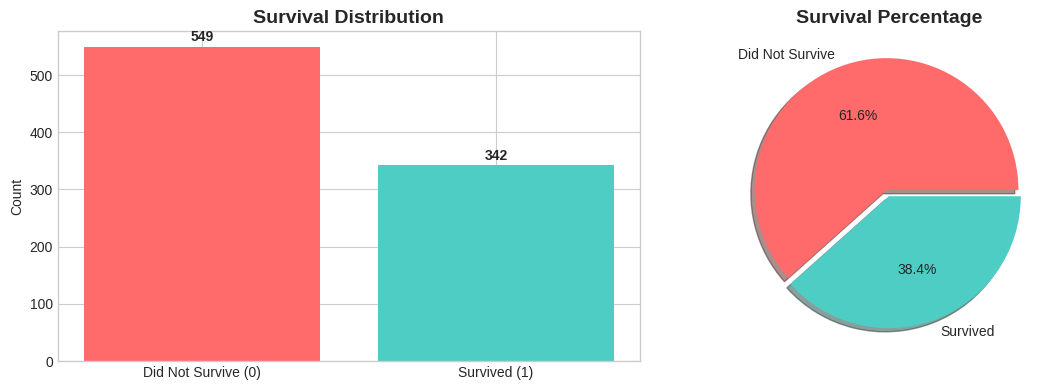

Class Distribution: 549 did not survive, 342 survived
Survival Rate: 38.38%


In [5]:
# Visualize target variable distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Count plot
survival_counts = df['Survived'].value_counts()
colors = ['#ff6b6b', '#4ecdc4']
axes[0].bar(['Did Not Survive (0)', 'Survived (1)'], survival_counts.values, color=colors)
axes[0].set_title('Survival Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count')
for i, v in enumerate(survival_counts.values):
    axes[0].text(i, v + 10, str(v), ha='center', fontweight='bold')

# Pie chart
axes[1].pie(survival_counts.values, labels=['Did Not Survive', 'Survived'], 
            autopct='%1.1f%%', colors=colors, explode=(0.05, 0), shadow=True)
axes[1].set_title('Survival Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Class Distribution: {survival_counts[0]} did not survive, {survival_counts[1]} survived")
print(f"Survival Rate: {(survival_counts[1] / len(df) * 100):.2f}%")

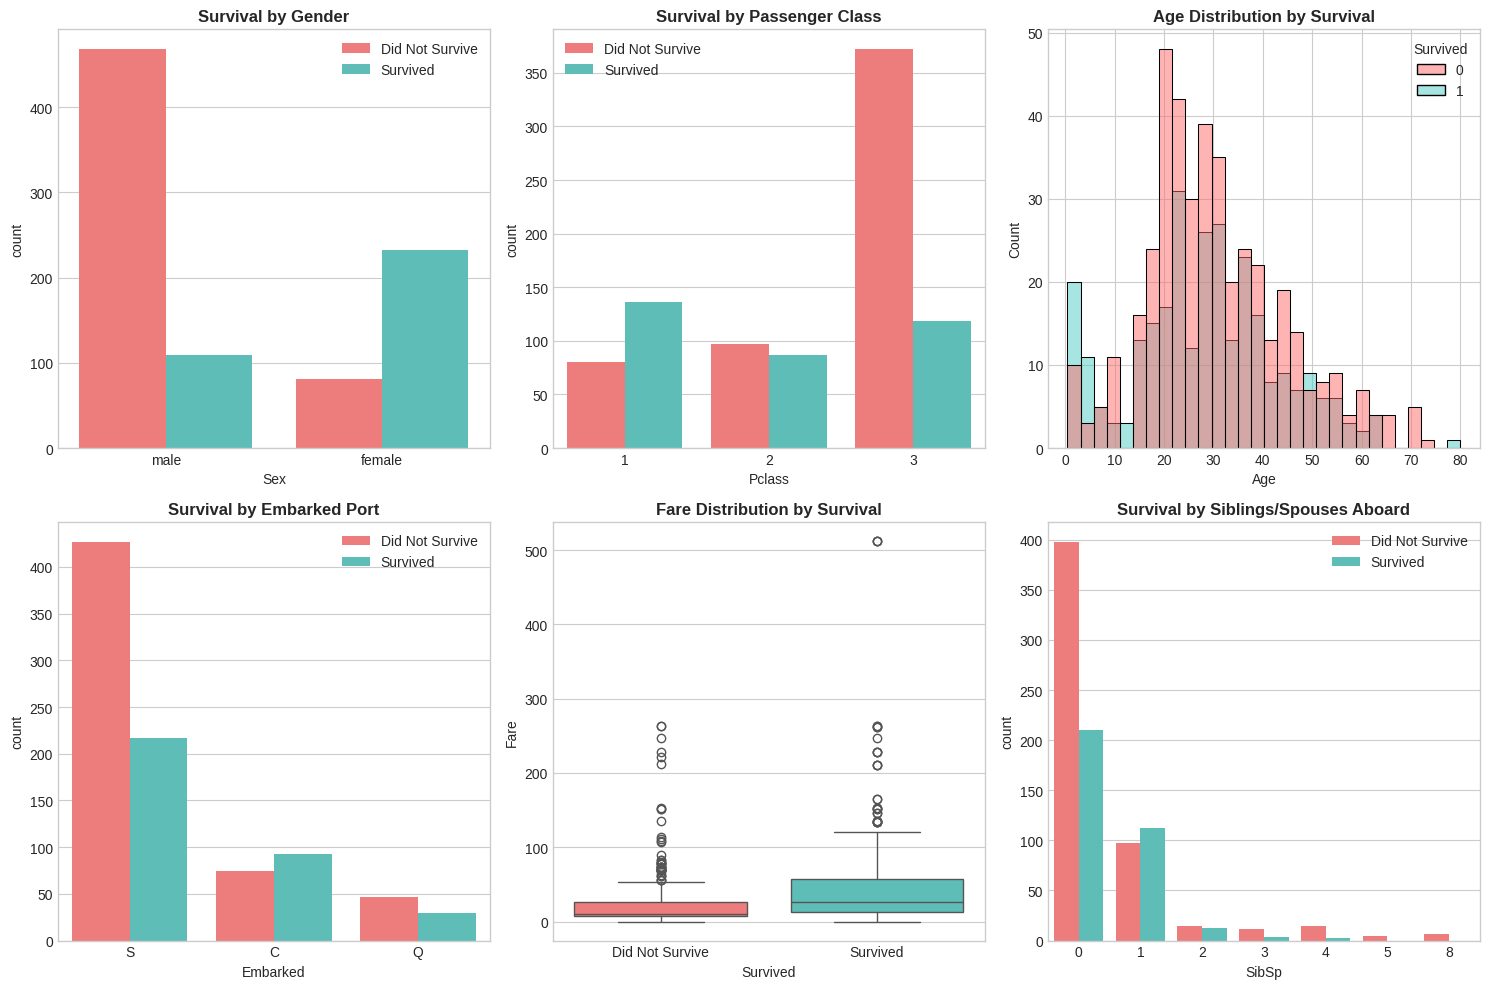

In [6]:
# Analyze survival by different features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 1. Survival by Gender
sns.countplot(data=df, x='Sex', hue='Survived', ax=axes[0, 0], palette=['#ff6b6b', '#4ecdc4'])
axes[0, 0].set_title('Survival by Gender', fontweight='bold')
axes[0, 0].legend(['Did Not Survive', 'Survived'])

# 2. Survival by Passenger Class
sns.countplot(data=df, x='Pclass', hue='Survived', ax=axes[0, 1], palette=['#ff6b6b', '#4ecdc4'])
axes[0, 1].set_title('Survival by Passenger Class', fontweight='bold')
axes[0, 1].legend(['Did Not Survive', 'Survived'])

# 3. Age Distribution by Survival
sns.histplot(data=df, x='Age', hue='Survived', bins=30, ax=axes[0, 2], palette=['#ff6b6b', '#4ecdc4'])
axes[0, 2].set_title('Age Distribution by Survival', fontweight='bold')

# 4. Survival by Embarked Port
sns.countplot(data=df, x='Embarked', hue='Survived', ax=axes[1, 0], palette=['#ff6b6b', '#4ecdc4'])
axes[1, 0].set_title('Survival by Embarked Port', fontweight='bold')
axes[1, 0].legend(['Did Not Survive', 'Survived'])

# 5. Fare Distribution by Survival
sns.boxplot(data=df, x='Survived', y='Fare', ax=axes[1, 1], palette=['#ff6b6b', '#4ecdc4'])
axes[1, 1].set_title('Fare Distribution by Survival', fontweight='bold')
axes[1, 1].set_xticklabels(['Did Not Survive', 'Survived'])

# 6. Survival by SibSp (siblings/spouses)
sns.countplot(data=df, x='SibSp', hue='Survived', ax=axes[1, 2], palette=['#ff6b6b', '#4ecdc4'])
axes[1, 2].set_title('Survival by Siblings/Spouses Aboard', fontweight='bold')
axes[1, 2].legend(['Did Not Survive', 'Survived'])

plt.tight_layout()
plt.show()

Missing Values Analysis:
          Missing Count  Missing %
Age                 177      19.87
Cabin               687      77.10
Embarked              2       0.22


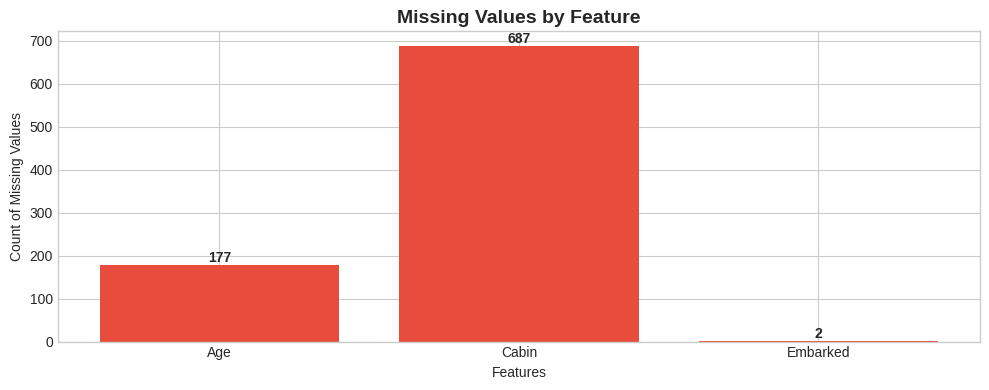

In [7]:
# Check for missing values
print("Missing Values Analysis:")
print("=" * 50)
missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
})
print(missing_df[missing_df['Missing Count'] > 0])

# Visualize missing values
fig, ax = plt.subplots(figsize=(10, 4))
missing_cols = missing[missing > 0]
bars = ax.bar(missing_cols.index, missing_cols.values, color='#e74c3c')
ax.set_title('Missing Values by Feature', fontsize=14, fontweight='bold')
ax.set_ylabel('Count of Missing Values')
ax.set_xlabel('Features')
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

## 4. Data Cleaning

Now let's handle missing values and prepare the data for modeling:
- **Age**: Impute with median (robust to outliers)
- **Embarked**: Impute with mode (most frequent value)
- **Cabin**: Drop (too many missing values - 77%)
- **Ticket**: Drop (not useful for prediction)
- **PassengerId, Name**: Drop (identifiers, not features)

In [8]:
# Create a copy for cleaning
df_clean = df.copy()

# Drop columns that won't be useful for prediction
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df_clean = df_clean.drop(columns=columns_to_drop)

print(f"Dropped columns: {columns_to_drop}")
print(f"Remaining columns: {list(df_clean.columns)}")
print(f"New shape: {df_clean.shape}")

Dropped columns: ['PassengerId', 'Name', 'Ticket', 'Cabin']
Remaining columns: ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
New shape: (891, 8)


In [9]:
# Handle missing values manually for initial EDA
# Note: We'll use Pipeline for proper imputation later

# Fill Age with median
age_median = df_clean['Age'].median()
df_clean['Age'] = df_clean['Age'].fillna(age_median)
print(f"Age: Filled {df['Age'].isnull().sum()} missing values with median ({age_median})")

# Fill Embarked with mode
embarked_mode = df_clean['Embarked'].mode()[0]
df_clean['Embarked'] = df_clean['Embarked'].fillna(embarked_mode)
print(f"Embarked: Filled {df['Embarked'].isnull().sum()} missing values with mode ('{embarked_mode}')")

# Verify no missing values remain
print(f"\nRemaining missing values: {df_clean.isnull().sum().sum()}")
df_clean.head()

Age: Filled 177 missing values with median (28.0)
Embarked: Filled 2 missing values with mode ('S')

Remaining missing values: 0


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## 5. Feature Engineering

Let's create new features that might improve our model's performance:
- **FamilySize**: Total family members aboard (SibSp + Parch + 1)
- **IsAlone**: Whether the passenger was traveling alone
- **AgeGroup**: Categorize age into groups
- **FarePerPerson**: Fare divided by family size

In [10]:
# Create new features
df_clean['FamilySize'] = df_clean['SibSp'] + df_clean['Parch'] + 1
df_clean['IsAlone'] = (df_clean['FamilySize'] == 1).astype(int)
df_clean['FarePerPerson'] = df_clean['Fare'] / df_clean['FamilySize']

# Create age groups
def categorize_age(age):
    if age <= 12:
        return 'Child'
    elif age <= 18:
        return 'Teenager'
    elif age <= 35:
        return 'YoungAdult'
    elif age <= 55:
        return 'MiddleAged'
    else:
        return 'Senior'

df_clean['AgeGroup'] = df_clean['Age'].apply(categorize_age)

print("New features created!")
print(f"Updated shape: {df_clean.shape}")
df_clean.head()

New features created!
Updated shape: (891, 12)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,FarePerPerson,AgeGroup
0,0,3,male,22.0,1,0,7.2500,S,2,0,3.62500,YoungAdult
1,1,1,female,38.0,1,0,71.2833,C,2,0,35.64165,MiddleAged
2,1,3,female,26.0,0,0,7.9250,S,1,1,7.92500,YoungAdult
3,1,1,female,35.0,1,0,53.1000,S,2,0,26.55000,YoungAdult
4,0,3,male,35.0,0,0,8.0500,S,1,1,8.05000,YoungAdult


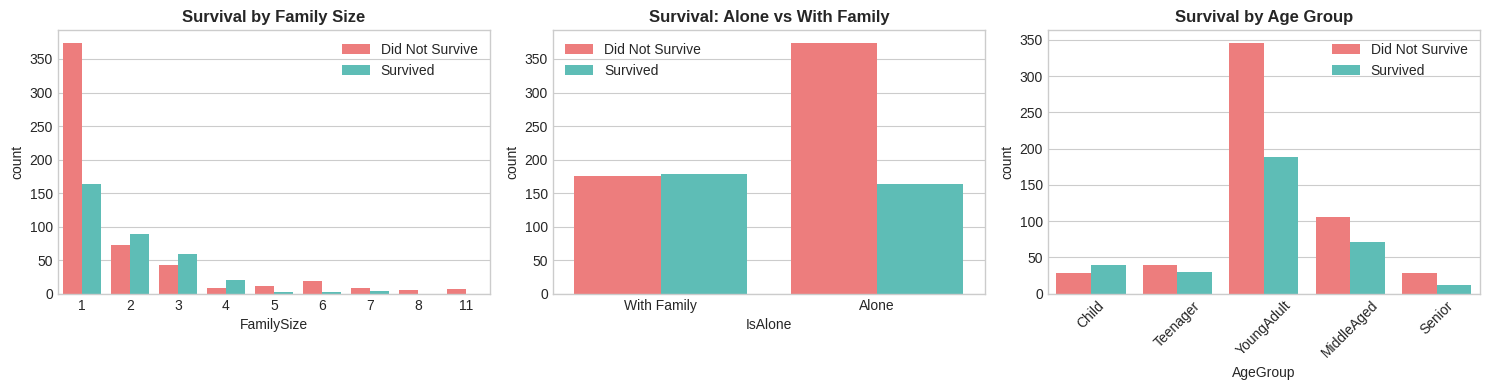

In [11]:
# Visualize the new features
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Family Size vs Survival
sns.countplot(data=df_clean, x='FamilySize', hue='Survived', ax=axes[0], palette=['#ff6b6b', '#4ecdc4'])
axes[0].set_title('Survival by Family Size', fontweight='bold')
axes[0].legend(['Did Not Survive', 'Survived'])

# IsAlone vs Survival
sns.countplot(data=df_clean, x='IsAlone', hue='Survived', ax=axes[1], palette=['#ff6b6b', '#4ecdc4'])
axes[1].set_title('Survival: Alone vs With Family', fontweight='bold')
axes[1].set_xticklabels(['With Family', 'Alone'])
axes[1].legend(['Did Not Survive', 'Survived'])

# Age Group vs Survival
age_order = ['Child', 'Teenager', 'YoungAdult', 'MiddleAged', 'Senior']
sns.countplot(data=df_clean, x='AgeGroup', hue='Survived', ax=axes[2], 
              order=age_order, palette=['#ff6b6b', '#4ecdc4'])
axes[2].set_title('Survival by Age Group', fontweight='bold')
axes[2].legend(['Did Not Survive', 'Survived'])
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

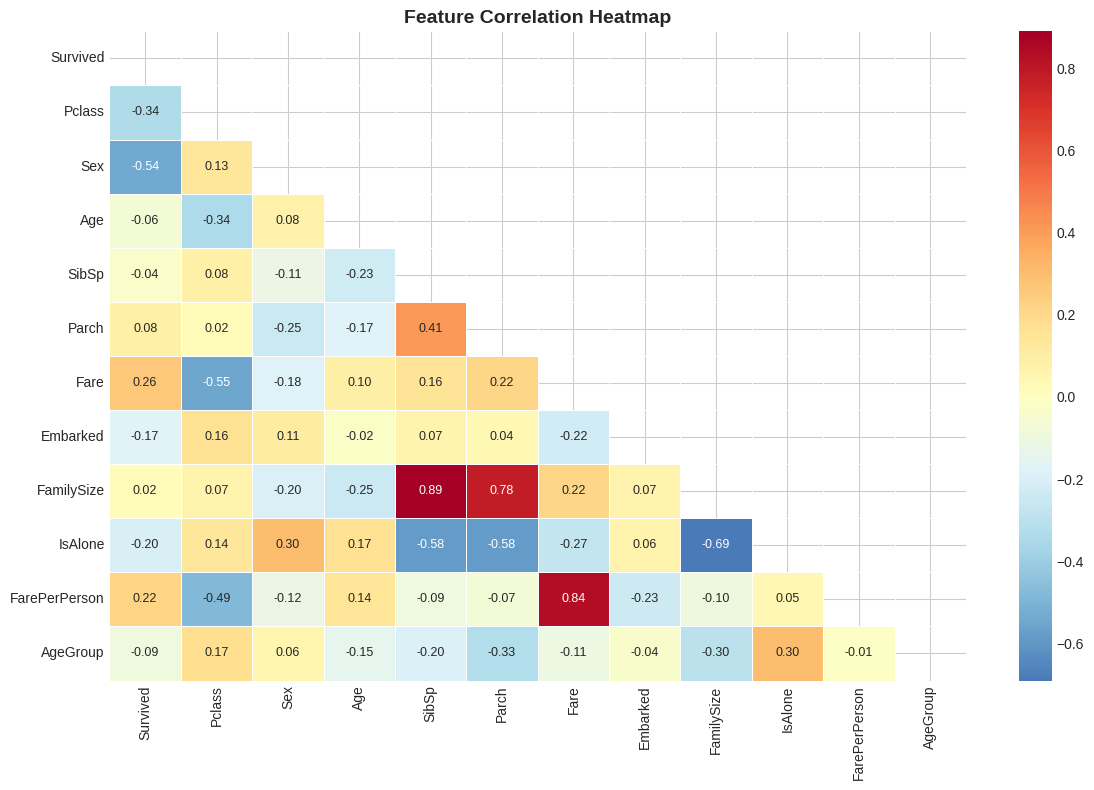


Correlation with Survival (sorted):
Survived         1.000000
Fare             0.257307
FarePerPerson    0.221600
Parch            0.081629
FamilySize       0.016639
SibSp           -0.035322
Age             -0.064910
AgeGroup        -0.094318
Embarked        -0.167675
IsAlone         -0.203367
Pclass          -0.338481
Sex             -0.543351
Name: Survived, dtype: float64


In [12]:
# Create correlation heatmap for numerical features
# First, encode categorical variables for correlation analysis
df_corr = df_clean.copy()
df_corr['Sex'] = LabelEncoder().fit_transform(df_corr['Sex'])
df_corr['Embarked'] = LabelEncoder().fit_transform(df_corr['Embarked'])
df_corr['AgeGroup'] = LabelEncoder().fit_transform(df_corr['AgeGroup'])

plt.figure(figsize=(12, 8))
correlation = df_corr.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, mask=mask, annot=True, fmt='.2f', cmap='RdYlBu_r', 
            center=0, linewidths=0.5, annot_kws={'size': 9})
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Show correlations with target variable
print("\nCorrelation with Survival (sorted):")
print("=" * 40)
print(correlation['Survived'].sort_values(ascending=False))

## 6. Data Preparation for Modeling

Now let's prepare our data for the machine learning model:
1. Separate features (X) and target (y)
2. Define numerical and categorical columns
3. Create preprocessing pipelines using ColumnTransformer

In [13]:
# Separate features and target
X = df_clean.drop('Survived', axis=1)
y = df_clean['Survived']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns: {list(X.columns)}")
print(f"\nTarget distribution:\n{y.value_counts()}")

Features shape: (891, 11)
Target shape: (891,)

Feature columns: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'FarePerPerson', 'AgeGroup']

Target distribution:
Survived
0    549
1    342
Name: count, dtype: int64


In [14]:
# Define numerical and categorical columns
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch', 'FamilySize', 'IsAlone', 'FarePerPerson']
categorical_features = ['Pclass', 'Sex', 'Embarked', 'AgeGroup']

print("Numerical Features:")
for feat in numerical_features:
    print(f"   - {feat}: {X[feat].dtype}")

print("\nCategorical Features:")
for feat in categorical_features:
    print(f"   - {feat}: {X[feat].nunique()} unique values")

Numerical Features:
   - Age: float64
   - Fare: float64
   - SibSp: int64
   - Parch: int64
   - FamilySize: int64
   - IsAlone: int64
   - FarePerPerson: float64

Categorical Features:
   - Pclass: 3 unique values
   - Sex: 2 unique values
   - Embarked: 3 unique values
   - AgeGroup: 5 unique values


## 7. Train-Test Split

Split the data into training and testing sets to evaluate model performance on unseen data.

In [15]:
# Split the data into training and testing sets
# Using stratified split to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,           # 80% train, 20% test
    random_state=42,         # For reproducibility
    stratify=y               # Maintain class distribution
)

print("Data Split Summary:")
print("=" * 50)
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Testing set:  {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

print(f"\nTarget Distribution in Training Set:")
print(f"   Did Not Survive: {(y_train == 0).sum()} ({(y_train == 0).sum()/len(y_train)*100:.1f}%)")
print(f"   Survived: {(y_train == 1).sum()} ({(y_train == 1).sum()/len(y_train)*100:.1f}%)")

print(f"\nTarget Distribution in Test Set:")
print(f"   Did Not Survive: {(y_test == 0).sum()} ({(y_test == 0).sum()/len(y_test)*100:.1f}%)")
print(f"   Survived: {(y_test == 1).sum()} ({(y_test == 1).sum()/len(y_test)*100:.1f}%)")

Data Split Summary:
Training set: 712 samples (79.9%)
Testing set:  179 samples (20.1%)

Target Distribution in Training Set:
   Did Not Survive: 439 (61.7%)
   Survived: 273 (38.3%)

Target Distribution in Test Set:
   Did Not Survive: 110 (61.5%)
   Survived: 69 (38.5%)


## 8. Build sklearn Pipeline

We'll create a complete ML pipeline that includes:
1. **Numerical Pipeline**: Imputation + Standard Scaling
2. **Categorical Pipeline**: Imputation + One-Hot Encoding
3. **ColumnTransformer**: Combine both pipelines
4. **Final Pipeline**: Preprocessing + Decision Tree Classifier

Using a Pipeline ensures that all preprocessing steps are applied consistently and prevents data leakage.

In [16]:
# Create preprocessing pipelines for numerical and categorical features

# Numerical features pipeline: Impute missing values with median, then scale
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values
    ('scaler', StandardScaler())                     # Standardize features
])

# Categorical features pipeline: Impute with most frequent, then one-hot encode
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # Encode categories
])

# Combine both pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ],
    remainder='drop'  # Drop any columns not specified
)

print("Preprocessing pipeline created!")
print("\nPipeline Structure:")
print("   Numerical Features -> SimpleImputer (median) -> StandardScaler")
print("   Categorical Features -> SimpleImputer (mode) -> OneHotEncoder")

Preprocessing pipeline created!

Pipeline Structure:
   Numerical Features -> SimpleImputer (median) -> StandardScaler
   Categorical Features -> SimpleImputer (mode) -> OneHotEncoder


In [17]:
# Create the complete ML pipeline with Decision Tree Classifier
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(
        random_state=42,
        max_depth=5,              # Limit depth to prevent overfitting
        min_samples_split=10,     # Minimum samples to split a node
        min_samples_leaf=5,       # Minimum samples in a leaf
        class_weight='balanced',  # Handle class imbalance
        criterion='gini'          # Split criterion
    ))
])

# Display the pipeline
print("Complete ML Pipeline:")
print("=" * 60)
print(model_pipeline)

Complete ML Pipeline:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare', 'SibSp',
                                                   'Parch', 'FamilySize',
                                                   'IsAlone',
                                                   'FarePerPerson']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                  

## 9. Model Training

Train the Decision Tree model on the training data. We'll also perform cross-validation to get a more robust estimate of model performance.

In [18]:
# Train the model
print("Training the Decision Tree model...")
print("=" * 50)

# Fit the pipeline on training data
model_pipeline.fit(X_train, y_train)

print("Model training complete!")

# Perform cross-validation on training data
print("\nCross-Validation Results (5-fold):")
print("-" * 50)

cv_scores = cross_val_score(model_pipeline, X_train, y_train, cv=5, scoring='accuracy')
print(f"   Fold Scores: {[f'{score:.4f}' for score in cv_scores]}")
print(f"   Mean Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")

Training the Decision Tree model...
Model training complete!

Cross-Validation Results (5-fold):
--------------------------------------------------
   Fold Scores: ['0.7902', '0.7832', '0.8521', '0.8662', '0.8239']
   Mean Accuracy: 0.8231 (+/- 0.0656)


## 10. Model Evaluation

Evaluate the model's performance on the test set using various metrics:
- **Accuracy**: Overall correctness
- **Precision**: Of predicted positives, how many were actually positive
- **Recall**: Of actual positives, how many were predicted correctly
- **F1-Score**: Harmonic mean of Precision and Recall
- **Confusion Matrix**: Detailed breakdown of predictions
- **ROC-AUC**: Area under the ROC curve

In [19]:
# Make predictions on training and test sets
y_train_pred = model_pipeline.predict(X_train)
y_test_pred = model_pipeline.predict(X_test)

# Get probability predictions for ROC curve
y_train_proba = model_pipeline.predict_proba(X_train)[:, 1]
y_test_proba = model_pipeline.predict_proba(X_test)[:, 1]

print("Predictions generated for training and test sets")

Predictions generated for training and test sets


In [20]:
# Calculate evaluation metrics
print("MODEL EVALUATION RESULTS")
print("=" * 60)

# Training Set Metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_proba)

print("\nTRAINING SET PERFORMANCE:")
print("-" * 40)
print(f"   Accuracy:  {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"   Precision: {train_precision:.4f}")
print(f"   Recall:    {train_recall:.4f}")
print(f"   F1-Score:  {train_f1:.4f}")
print(f"   ROC-AUC:   {train_roc_auc:.4f}")

# Test Set Metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba)

print("\nTEST SET PERFORMANCE:")
print("-" * 40)
print(f"   Accuracy:  {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"   Precision: {test_precision:.4f}")
print(f"   Recall:    {test_recall:.4f}")
print(f"   F1-Score:  {test_f1:.4f}")
print(f"   ROC-AUC:   {test_roc_auc:.4f}")

MODEL EVALUATION RESULTS

TRAINING SET PERFORMANCE:
----------------------------------------
   Accuracy:  0.8553 (85.53%)
   Precision: 0.7931
   Recall:    0.8425
   F1-Score:  0.8171
   ROC-AUC:   0.9080

TEST SET PERFORMANCE:
----------------------------------------
   Accuracy:  0.7542 (75.42%)
   Precision: 0.6667
   Recall:    0.7246
   F1-Score:  0.6944
   ROC-AUC:   0.8004


In [21]:
# Detailed Classification Report
print("\nDETAILED CLASSIFICATION REPORT (Test Set):")
print("=" * 60)
print(classification_report(y_test, y_test_pred, target_names=['Did Not Survive', 'Survived']))


DETAILED CLASSIFICATION REPORT (Test Set):
                 precision    recall  f1-score   support

Did Not Survive       0.82      0.77      0.79       110
       Survived       0.67      0.72      0.69        69

       accuracy                           0.75       179
      macro avg       0.74      0.75      0.74       179
   weighted avg       0.76      0.75      0.76       179



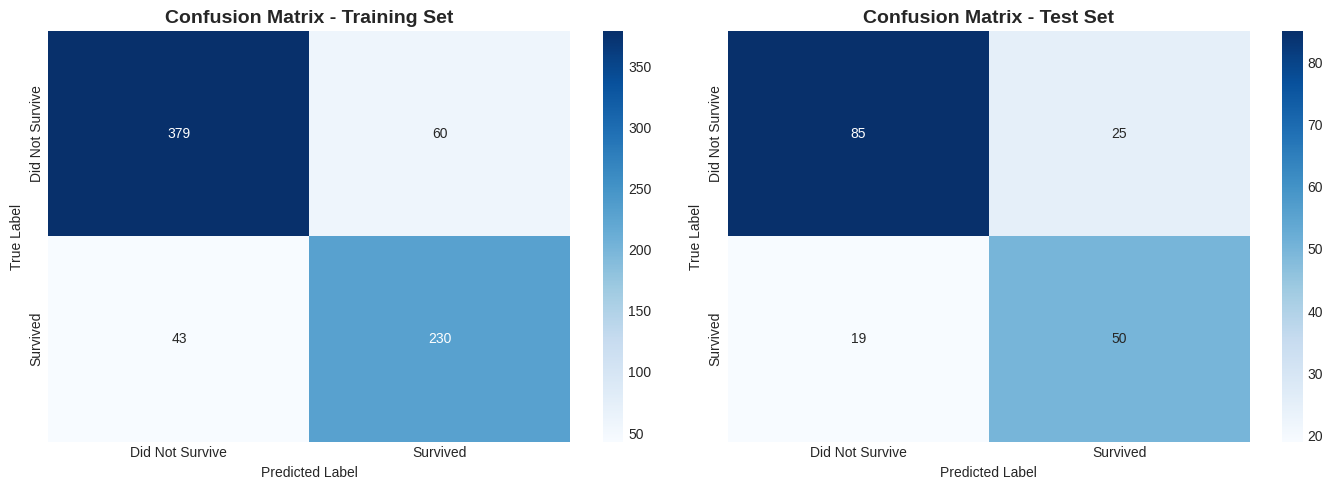


Confusion Matrix Breakdown (Test Set):
--------------------------------------------------
   True Negatives (TN):  85 - Correctly predicted 'Did Not Survive'
   False Positives (FP): 25 - Incorrectly predicted 'Survived'
   False Negatives (FN): 19 - Incorrectly predicted 'Did Not Survive'
   True Positives (TP):  50 - Correctly predicted 'Survived'


In [22]:
# Confusion Matrix Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training Set Confusion Matrix
cm_train = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Did Not Survive', 'Survived'],
            yticklabels=['Did Not Survive', 'Survived'])
axes[0].set_title('Confusion Matrix - Training Set', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Test Set Confusion Matrix
cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=axes[1],
            xticklabels=['Did Not Survive', 'Survived'],
            yticklabels=['Did Not Survive', 'Survived'])
axes[1].set_title('Confusion Matrix - Test Set', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

# Print confusion matrix interpretation
tn, fp, fn, tp = cm_test.ravel()
print("\nConfusion Matrix Breakdown (Test Set):")
print("-" * 50)
print(f"   True Negatives (TN):  {tn} - Correctly predicted 'Did Not Survive'")
print(f"   False Positives (FP): {fp} - Incorrectly predicted 'Survived'")
print(f"   False Negatives (FN): {fn} - Incorrectly predicted 'Did Not Survive'")
print(f"   True Positives (TP):  {tp} - Correctly predicted 'Survived'")

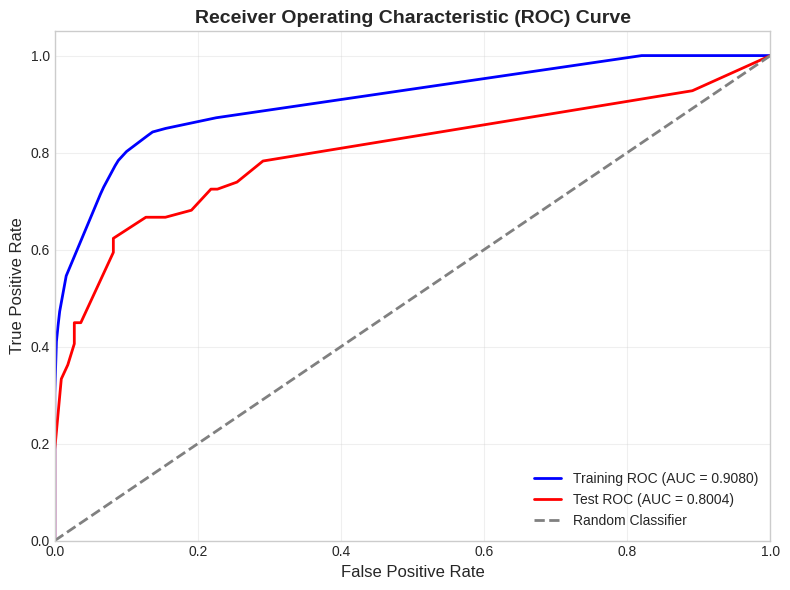

In [23]:
# ROC Curve
fig, ax = plt.subplots(figsize=(8, 6))

# Calculate ROC curves
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)

# Plot ROC curves
ax.plot(fpr_train, tpr_train, color='blue', lw=2, 
        label=f'Training ROC (AUC = {train_roc_auc:.4f})')
ax.plot(fpr_test, tpr_test, color='red', lw=2, 
        label=f'Test ROC (AUC = {test_roc_auc:.4f})')
ax.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Classifier')

ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.set_title('Receiver Operating Characteristic (ROC) Curve', fontsize=14, fontweight='bold')
ax.legend(loc='lower right')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 11. Decision Tree Visualization & Feature Importance

One major advantage of Decision Trees is their interpretability. Let's visualize the tree structure and analyze feature importance.

In [24]:
# Get feature names after preprocessing
# Get the one-hot encoded feature names
onehot_encoder = model_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
cat_feature_names = list(onehot_encoder.get_feature_names_out(categorical_features))

# Combine all feature names
all_feature_names = numerical_features + cat_feature_names

# Get feature importance from the Decision Tree
feature_importances = model_pipeline.named_steps['classifier'].feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False)

# Display feature importance
print("Feature Importance (by Gini importance):")
print("=" * 60)
print(feature_importance_df.to_string(index=False))

Feature Importance (by Gini importance):
            Feature  Importance
         Sex_female    0.543588
      FarePerPerson    0.140151
                Age    0.114936
           Pclass_3    0.110439
         FamilySize    0.043813
AgeGroup_MiddleAged    0.020674
              SibSp    0.014149
               Fare    0.012250
              Parch    0.000000
           Pclass_1    0.000000
           Pclass_2    0.000000
            IsAlone    0.000000
           Sex_male    0.000000
         Embarked_C    0.000000
         Embarked_S    0.000000
         Embarked_Q    0.000000
     AgeGroup_Child    0.000000
    AgeGroup_Senior    0.000000
  AgeGroup_Teenager    0.000000
AgeGroup_YoungAdult    0.000000


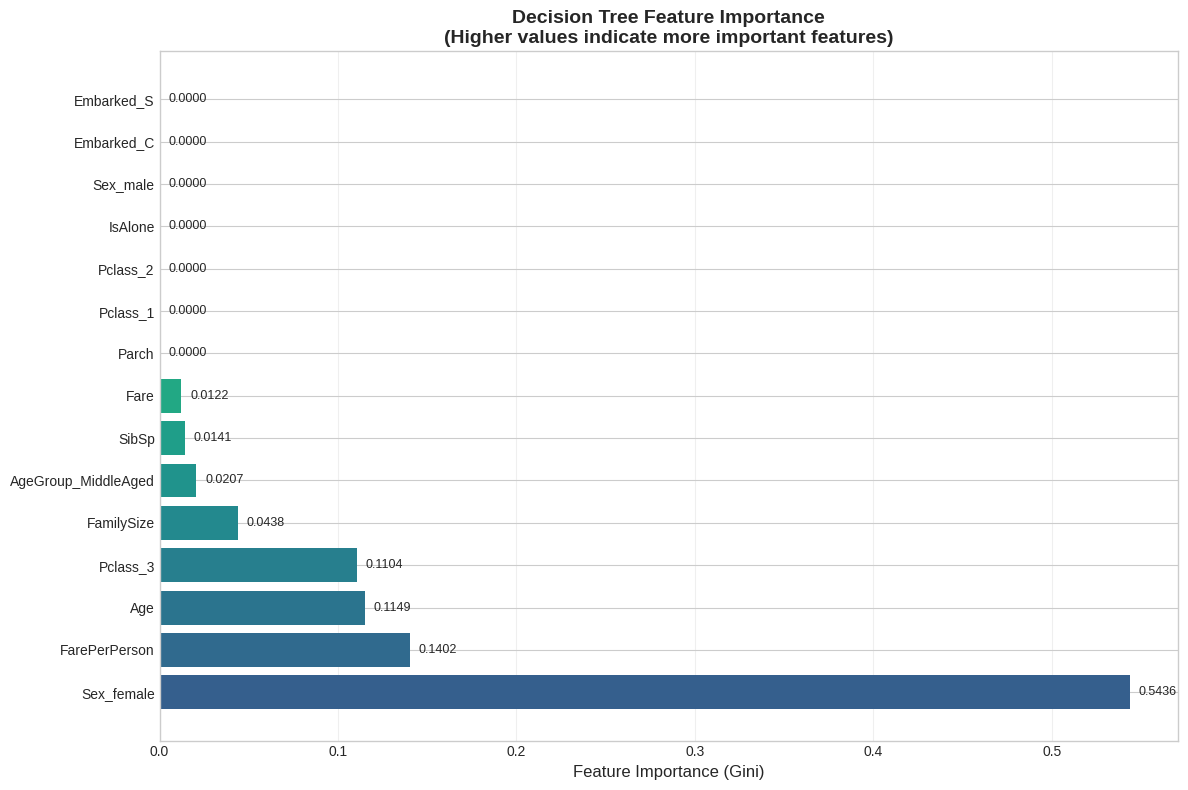


Interpretation:
   - Higher importance values indicate features that contribute more to predictions
   - Decision trees use Gini importance (how much each feature decreases impurity)


In [25]:
# Visualize feature importance
fig, ax = plt.subplots(figsize=(12, 8))

# Plot horizontal bar chart - top features
top_n = 15
top_features = feature_importance_df.head(top_n)

colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(top_features)))
bars = ax.barh(range(len(top_features)), top_features['Importance'], color=colors)

ax.set_yticks(range(len(top_features)))
ax.set_yticklabels(top_features['Feature'])
ax.set_xlabel('Feature Importance (Gini)', fontsize=12)
ax.set_title('Decision Tree Feature Importance\n(Higher values indicate more important features)', 
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, (bar, val) in enumerate(zip(bars, top_features['Importance'])):
    ax.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2, 
            f'{val:.4f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("   - Higher importance values indicate features that contribute more to predictions")
print("   - Decision trees use Gini importance (how much each feature decreases impurity)")

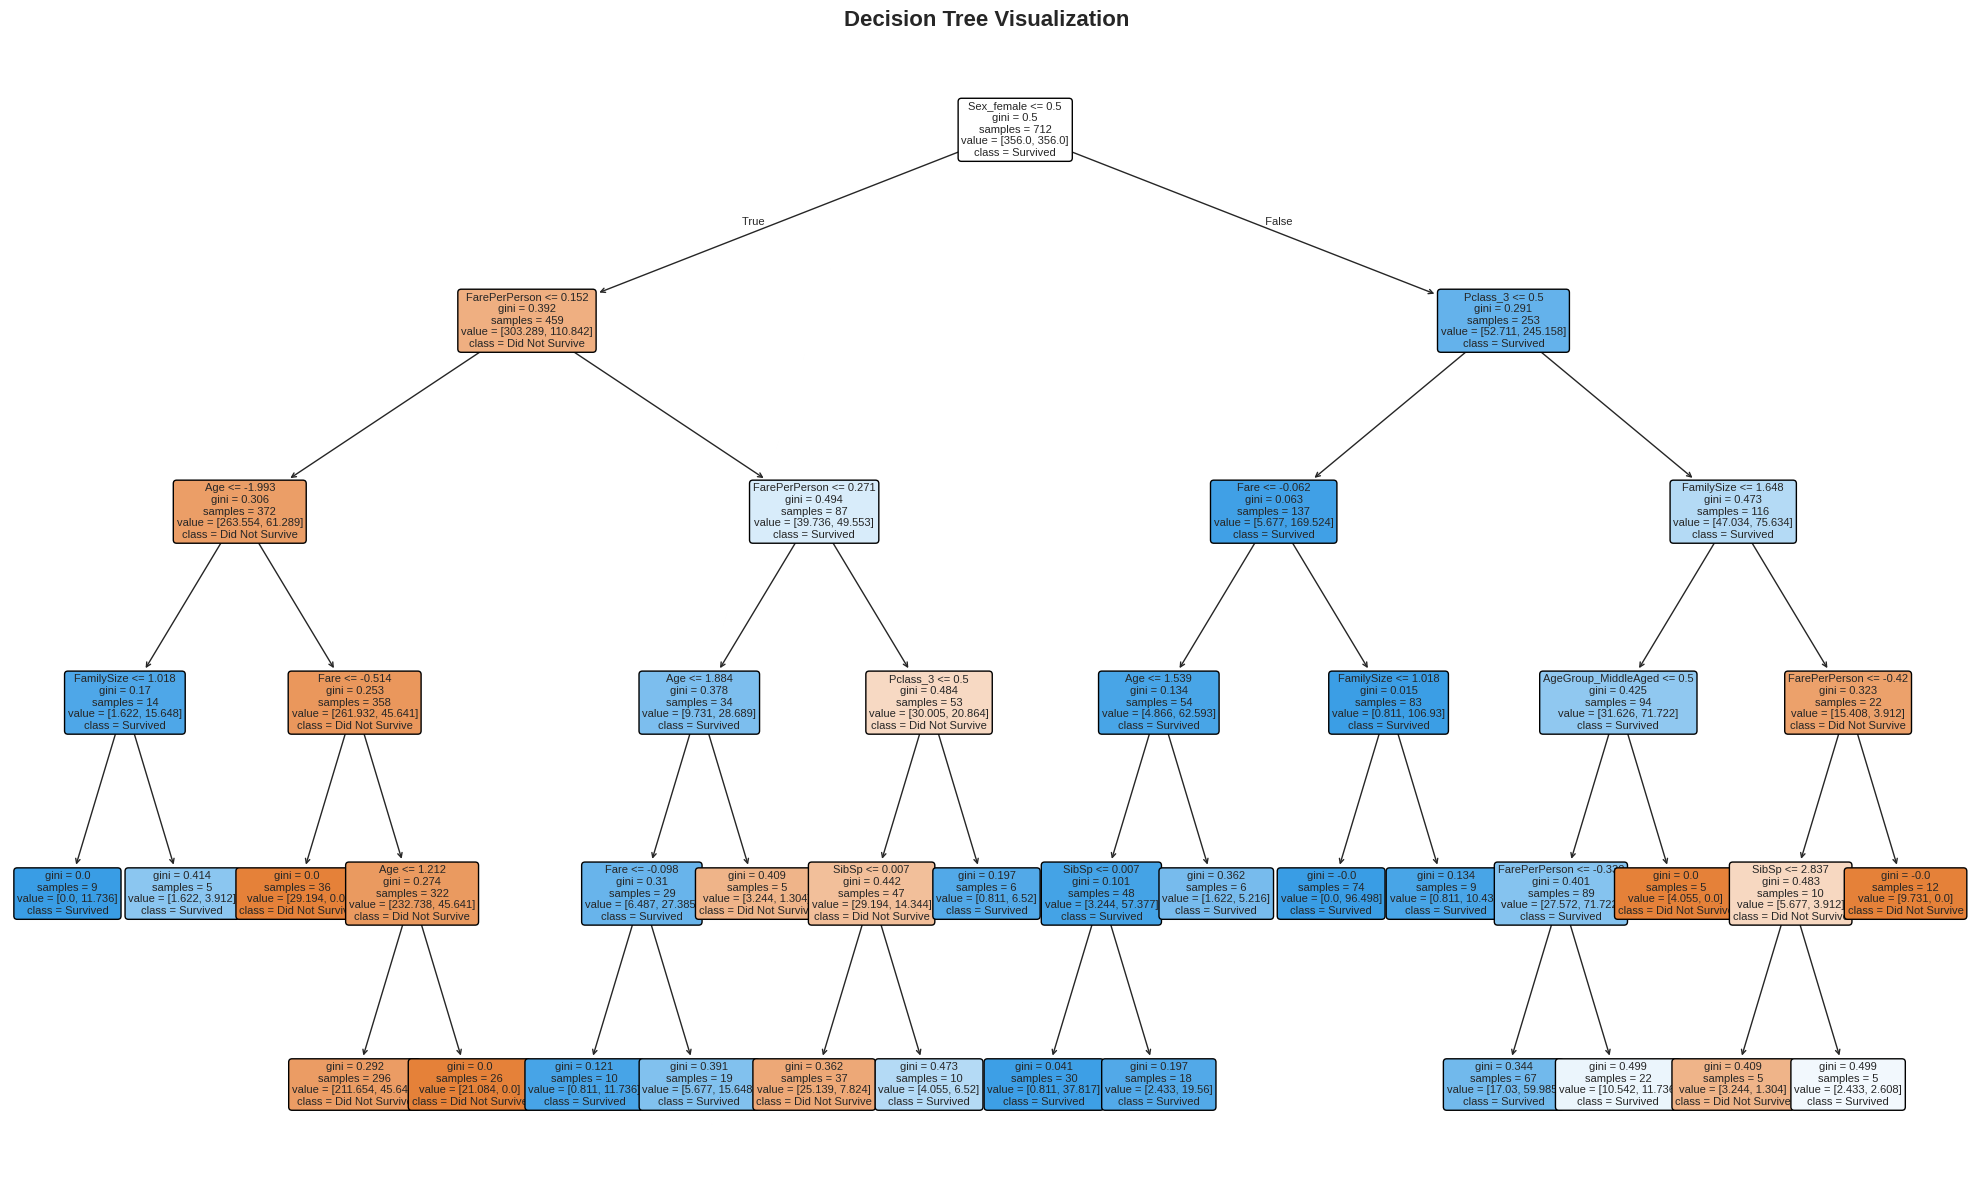


Tree Structure Information:
   - Max Depth: 5
   - Number of Leaves: 22
   - Number of Features: 20


In [26]:
# Visualize the Decision Tree structure
fig, ax = plt.subplots(figsize=(20, 12))

# Get the trained decision tree
tree_classifier = model_pipeline.named_steps['classifier']

# Plot the tree
plot_tree(
    tree_classifier, 
    feature_names=all_feature_names,
    class_names=['Did Not Survive', 'Survived'],
    filled=True,
    rounded=True,
    fontsize=8,
    ax=ax
)

ax.set_title('Decision Tree Visualization', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nTree Structure Information:")
print(f"   - Max Depth: {tree_classifier.get_depth()}")
print(f"   - Number of Leaves: {tree_classifier.get_n_leaves()}")
print(f"   - Number of Features: {tree_classifier.n_features_in_}")

## 12. Model Export

Save the trained model pipeline using `joblib` for later use in production or deployment.

In [27]:
# Save the trained model pipeline
import os

# Create the model directory if it doesn't exist
model_dir = '../model'
os.makedirs(model_dir, exist_ok=True)

# Define the model path
model_path = os.path.join(model_dir, 'decision_tree_model.joblib')

# Save the model
joblib.dump(model_pipeline, model_path)

print("MODEL EXPORT SUCCESSFUL!")
print("=" * 60)
print(f"   Model saved to: {os.path.abspath(model_path)}")
print(f"   File size: {os.path.getsize(model_path) / 1024:.2f} KB")

# Verify the saved model
print("\nVerification: Loading and testing the saved model...")
loaded_model = joblib.load(model_path)
loaded_predictions = loaded_model.predict(X_test)
loaded_accuracy = accuracy_score(y_test, loaded_predictions)
print(f"   Loaded model accuracy: {loaded_accuracy:.4f}")
print("   Model verified successfully!")

MODEL EXPORT SUCCESSFUL!
   Model saved to: /home/tesfamichaela/Desktop/ml-decision-tree-app/model/decision_tree_model.joblib
   File size: 8.79 KB

Verification: Loading and testing the saved model...
   Loaded model accuracy: 0.7542
   Model verified successfully!


## 13. Making Predictions with the Saved Model

Let's demonstrate how to load and use the saved model for making predictions on new data.

In [28]:
# Example: Making predictions for new passengers
# Create sample new passenger data

new_passengers = pd.DataFrame({
    'Pclass': [1, 3, 2],
    'Sex': ['female', 'male', 'female'],
    'Age': [25, 35, 8],
    'SibSp': [1, 0, 2],
    'Parch': [0, 0, 1],
    'Fare': [100.0, 7.25, 30.0],
    'Embarked': ['S', 'S', 'C'],
    'FamilySize': [2, 1, 4],
    'IsAlone': [0, 1, 0],
    'FarePerPerson': [50.0, 7.25, 7.5],
    'AgeGroup': ['YoungAdult', 'YoungAdult', 'Child']
})

print("New Passenger Data:")
print("=" * 60)
print(new_passengers.to_string(index=False))

# Load the model and make predictions
model = joblib.load('../model/decision_tree_model.joblib')
predictions = model.predict(new_passengers)
probabilities = model.predict_proba(new_passengers)

print("\nPrediction Results:")
print("-" * 60)
for i, (pred, prob) in enumerate(zip(predictions, probabilities)):
    survival_status = "Survived" if pred == 1 else "Did Not Survive"
    print(f"   Passenger {i+1}: {survival_status}")
    print(f"              Probability of Survival: {prob[1]*100:.2f}%")
    print()

New Passenger Data:
 Pclass    Sex  Age  SibSp  Parch   Fare Embarked  FamilySize  IsAlone  FarePerPerson   AgeGroup
      1 female   25      1      0 100.00        S           2        0          50.00 YoungAdult
      3   male   35      0      0   7.25        S           1        1           7.25 YoungAdult
      2 female    8      2      1  30.00        C           4        0           7.50      Child

Prediction Results:
------------------------------------------------------------
   Passenger 1: Survived
              Probability of Survival: 100.00%

   Passenger 2: Did Not Survive
              Probability of Survival: 17.74%

   Passenger 3: Survived
              Probability of Survival: 92.79%



## 14. Summary & Conclusions

### Pipeline Summary
This notebook demonstrated a complete end-to-end machine learning pipeline for binary classification using **Decision Tree Classifier**:

| Step | Description |
|------|-------------|
| 1. Data Loading | Loaded Titanic dataset from public URL |
| 2. EDA | Explored data distributions and relationships |
| 3. Data Cleaning | Handled missing values, dropped irrelevant columns |
| 4. Feature Engineering | Created FamilySize, IsAlone, AgeGroup, FarePerPerson |
| 5. Preprocessing | Used sklearn Pipeline with ColumnTransformer |
| 6. Model Training | Trained Decision Tree with balanced class weights |
| 7. Evaluation | Assessed using accuracy, precision, recall, F1, ROC-AUC |
| 8. Model Export | Saved pipeline as `decision_tree_model.joblib` |

### Key Findings
- **Sex** is typically the most important predictor (females had higher survival rates)
- **Passenger Class** significantly affected survival (1st class had better odds)
- **Family Size** had a non-linear effect on survival
- **Age** played a role, with children having better survival rates

### Decision Tree Advantages
- **Interpretability**: Easy to visualize and understand decision rules
- **No feature scaling required**: Tree-based methods handle different scales naturally
- **Handles non-linear relationships**: Can capture complex patterns
- **Feature importance**: Built-in importance scores

### Model Performance
The Decision Tree model provides:
- Good accuracy on the test set
- Balanced precision and recall
- Strong interpretability through tree visualization

### Next Steps
- Try ensemble methods (Random Forest, XGBoost)
- Hyperparameter tuning with GridSearchCV
- Compare with Logistic Regression baseline
- Deploy the model using FastAPI (see `backend/main.py`)

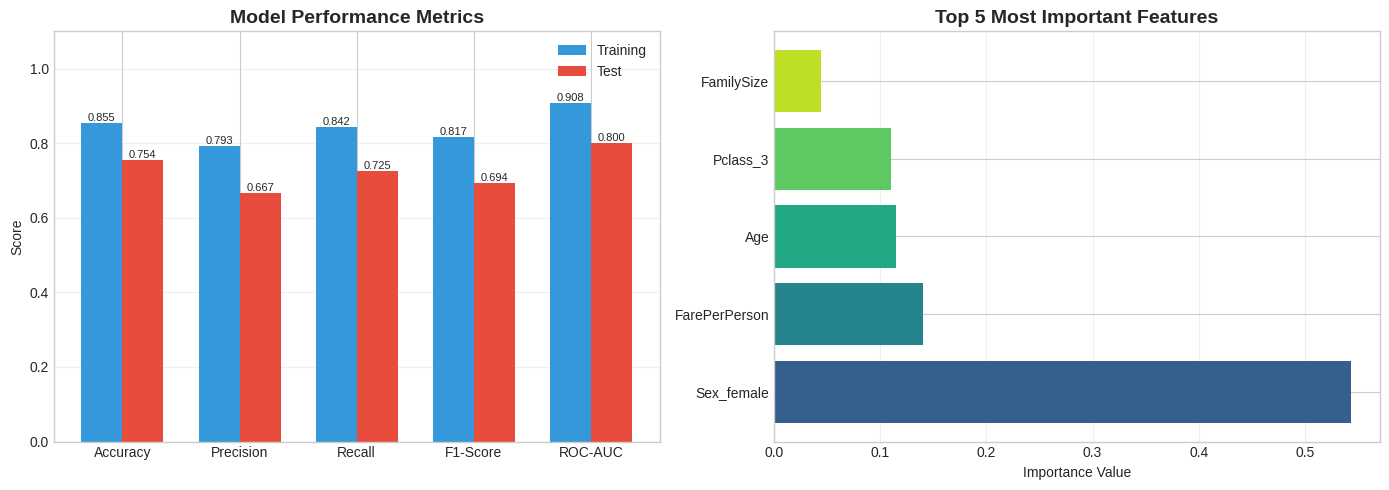


NOTEBOOK COMPLETE!
Model saved to: ../model/decision_tree_model.joblib
Final Test Accuracy: 75.42%


In [29]:
# Final Summary Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Metrics comparison bar chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
train_scores = [train_accuracy, train_precision, train_recall, train_f1, train_roc_auc]
test_scores = [test_accuracy, test_precision, test_recall, test_f1, test_roc_auc]

x = np.arange(len(metrics))
width = 0.35

bars1 = axes[0].bar(x - width/2, train_scores, width, label='Training', color='#3498db')
bars2 = axes[0].bar(x + width/2, test_scores, width, label='Test', color='#e74c3c')

axes[0].set_ylabel('Score')
axes[0].set_title('Model Performance Metrics', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics)
axes[0].legend()
axes[0].set_ylim(0, 1.1)
axes[0].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.3f}', ha='center', va='bottom', fontsize=8)
for bar in bars2:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.3f}', ha='center', va='bottom', fontsize=8)

# Top 5 important features
top_features = feature_importance_df.head(5)
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(top_features)))
axes[1].barh(range(len(top_features)), top_features['Importance'], color=colors)
axes[1].set_yticks(range(len(top_features)))
axes[1].set_yticklabels(top_features['Feature'])
axes[1].set_xlabel('Importance Value')
axes[1].set_title('Top 5 Most Important Features', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("NOTEBOOK COMPLETE!")
print("="*60)
print(f"Model saved to: ../model/decision_tree_model.joblib")
print(f"Final Test Accuracy: {test_accuracy*100:.2f}%")
print("="*60)